# 8. Iris projekt
## Prvi projekt strojnog učenja - korak po korak

U ovom projektu naučiti ćete:
- Kako preuzeti i instalirati R te istalirati potrebne pakete u njemu.
- Učitati skup podataka te shvatiti njegovu strukturu koristeći statistiku i vizualizaciju podataka.
- Napraviti 5 modela strojnog učenja i odabrati najbolji, a zatim procijeniti njegovu pouzdanost.

Najbolji način da bi naučili određeni programski jezik ili shvatili logiku nekog modela jest riješiti jedan jednostavan zadatak od početka do kraja - korak po korak.
Naš proces modela stojnog učenja sastojati će se od 5 jednostavnih koraka:
1. Definiranje problema
2. Priprema podataka
3. Evaluacija algoritama
4. Popravljanje rezultata
5. Prezentacija rezultata

Kada to naučite, imati ćete predložak za rješavanje ostalih problema strojnog učenja jednostavno mijenjajući skupove podataka.

## Projekt...
Za potrebe našeg prvog projekta koristiti ćemo skup podataka pod nazivom *"Iris"*.  
Ovo je dobar skup za naš projekt, jer ćemo kroz njega puno toga naučiti:
- Atributi su numerički pa ćemo morati shvatiti kako učitati i obraditi podatke.
- To je klasifikacijski problem, koji nam omogućuje vježbanje s možda lakšom vrstom algoritama nadziranog strojnog učenja.
- Problem je višeklasne klasifikacije (multi class) što početniku može predstavljati izazov.
- Ima samo 4 atributa i 150 redaka, što znači da je skup malen i lako se može prikazati (na zaslon ili A4 stranicu).
- Svi numerički atributi su u istim jedinicama i na istoj ljestvici, te za početak nije potrebno posebno skaliranje ili pretvaranje.

Dakle, krenimo sa našim prvim projektom strojnog učenja u programskom jeziku R.

## Koraci...
1. Instaliranje R platforme.
2. Učitavanje skupa podataka.
3. Sažeti pregled skupa podataka.
4. Vizualizacija skupa podataka.
5. Evaluacija algoritama.
6. Predviđanje. 

## 1 Instalacija programske platforme R
### Preuzimanje programa
Programski paket R možemo preuzeti sa web stranice:  
https://www.r-project.org/  
Ovdje ćemo odabrati operativni sustav (Windows, MAC ili Linux) i preuzeti ga.  
### Instalacija programa
R je lagan za instalaciju i siguran sam da nećete imati problema.  
No, ukoliko "zapnete" ovdje imate jednostavne uputu za preuzimanje i instalaciju R paketa:  
https://www.datacamp.com/community/tutorials/installing-R-windows-mac-ubuntu  
Još jednostavnije je ukoliko koristimo Jupyter bilježnice - tada ne moramo ništa instalirati.  
### Pokretanje programa
Ovo je možda i suvišno govoriti...  
R pokrećemo dvoklikom na ikonu ili tako da u naredbenom retku ukucamo `R`.  
### Instalacija i učitavanje paketa
U našem projektu koristiti ćemo paket _"caret"_ i instalirati ćemo ga naredbom:


In [40]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Paket ćemo zatim učitati: 

In [41]:
 library(caret)

Paket _"caret"_ pruža dosljedno sučelje za stotine algoritama strojnog učenja i, među ostalim značajkama, pruža korisne metode za vizualizaciju podataka preraspodjelu podataka, podešavanje i usporedbu modela.  
To je često korišten i _"must have"_ alat za projekte strojnog učenja u R.  
Za više informacija o caret R paketu pogledajte početnu stranicu paketa za karet.

## 2 Učitavanje podataka i kreiranje skupova
Koristit ćemo `"Iris"` dataset.   
Ovaj je skup podataka poznat po tome što ga u velikoj mjeri svi koriste kao "Hello world" skup podataka u strojnom učenju i statistici.
Skup podataka sadrži 150 promatranja cvijeta irisa. Postoje četiri stupca mjerenja cvijeća u centimetrima. Peti stupac je vrsta promatranog cvijeta. Svi cvjetovi u datasetu pripadaju jednoj od tri vrste.

### Učitavanje na lakši način...
Srećom dataset `"Iris"` je sastavno dio R platforme te ga nije potrebno posebno uvoziti sa diska. Potrebno ga samo učitati (attach). 

In [3]:
# učitavanje dataseta iris u sustav
data(iris)
# možemo ga i preimenovati
dataset <- iris

### Učitavanje na teži način...
Iris dataset možemo preuzeti sa slijedećeg linka:
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data  
Datoteku snimimo u mapu projekta i učitamo ju.

In [ ]:
# učitavanje CSV datoteke iz lokalne mape
dataset <- read.csv("iris.data", header=FALSE)
# dodavanje imena stupaca datasetu
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

## Kreiranje dva skupa
Da bi na kraju mogli procijeniti da li nam je model dobar, dataset ćemo podijeliti na dva skupa.  
Prvi skup koji će sadržavati 80% podataka na kojem ćemo trenirati svoje modele i drugi skup sa 20% podataka kojeg ćemo zadržati kao skup za provjeru valjanosti.  
Jednostavnije rečeno:  
80% podataka - skup za treniranje  
20% podataka - skup za testiranja

In [32]:
# Kreiranje indeksa koji će podijeliti skup na 80:20
validation_index<-createDataPartition(dataset$Species, p =0.80, list = FALSE)

# Uzimamo 20% podataka za skup za testiranje
dataset_test<-dataset[-validation_index, ]

# Uzimamo 80% podataka za skup za treniranje
dataset_train<-dataset[validation_index, ]

## 3 Sažetak (sažeti pregled) skupa podataka
Podatke možemo pregledati na više načina:

1. Dimenzije skupa podataka
2. Vrste atributa
3. Pogled na same podatke
4. Razine klase (levels)
5. Raščlanjivanje primjeraka svake klase
6. Statistički sažetak svih atributa

### 3.1 Dimenzije skupa podataka (dataseta)
Da bi vidjeli koliko stupaca i redaka ima naš skup podataka koristimo ```dim()```.

In [5]:
# dimenzije dataseta
dim(dataset)

[1] 150   5

Vidimo da naš skup podataka ima 150 slučajeva i 5 atributa.

### 3.2 Vrste (tipovi) atributa
Kod obrade podataka dobro je znati kojega tipa su nam određeni podaci.  
Poznavanje tipova podataka je vrlo važno jer će nam dati ideju o tome kako bolje sažeti podatke i koje transformacije bi trebalo primijeniti za pripremu podataka prije modeliranja.

In [6]:
# Lista tipova za svaki atribut (varijablu)
sapply(dataset,class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [7]:
# Možemo koristiti i str() da bi vidjeli tipove atributa
str(dataset)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Vidimo da su prva četitri atributa numerička, dok je peti atribut 'Factor' (vrsta cvijeta).

### 3.3 Pogled na same podatke
Da bi bacili brzi pogled na podatke, bez da ispisujemo cijeli dataset, koristiti ćemo ```head()```.

In [8]:
# Pogled na prvih nekoliko redaka dataseta
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### 3.4 Razine klase (levels)
Posljednja varijabla našeg dataseta je faktor.  
Ona ima tri razine (klase, levela, oznake) - "setosa", "versicolor" i "virginica" 
Dakle, ovo je multiklasni ili multinominalni problem. Da su postojala samo dva levela, to bi bio problem binarne klasifikacije.

In [9]:
# leveli klase "Species"
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

### 3.5 Raščlanjivanje primjeraka svake klase
Pogledajmo sada broj instanci (redaka) koji pripadaju svakoj klasi. To možemo promatrati kao apsolutno brojanje (freq) i kao postotak (percentage).

In [15]:
table(dataset$Species)


    setosa versicolor  virginica 
        50         50         50 

Ili na malo "kompliciraniji" način:

In [16]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,50,33.33333
versicolor,50,33.33333
virginica,50,33.33333


Vidimo da ima jednak broj instanci u svakoj klasi.

### 3.6 Statistički sažetak svih atributa
Konačno, možemo pogledati sažetak svakog atributa.  
To uključuje sredinu, minimalnu i maksimalnu vrijednost kao i neke percentile (25., 50. ili medijan i 75.).  

In [17]:
# Sažetak distribucije atributa
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

## 4 Vizualizacija dataseta
Upoznati ćemo se sa dvije vrste grafova:  
1. Univarijantni  grafovi (da bolje shvatimo svaki atribut)
2. Multivarijantni grafovi (da bolje shvatimo relacije među atributima)

### 4.1 Univarijantni  grafovi
Univarijantni grafovi su grafovi pojedinačnih varijabli.  
Za početak pogledat ćemo grafove ulaznih varijabli (od prve do četvrte varijable), a zatim graf pete (izlazne) varijable.  

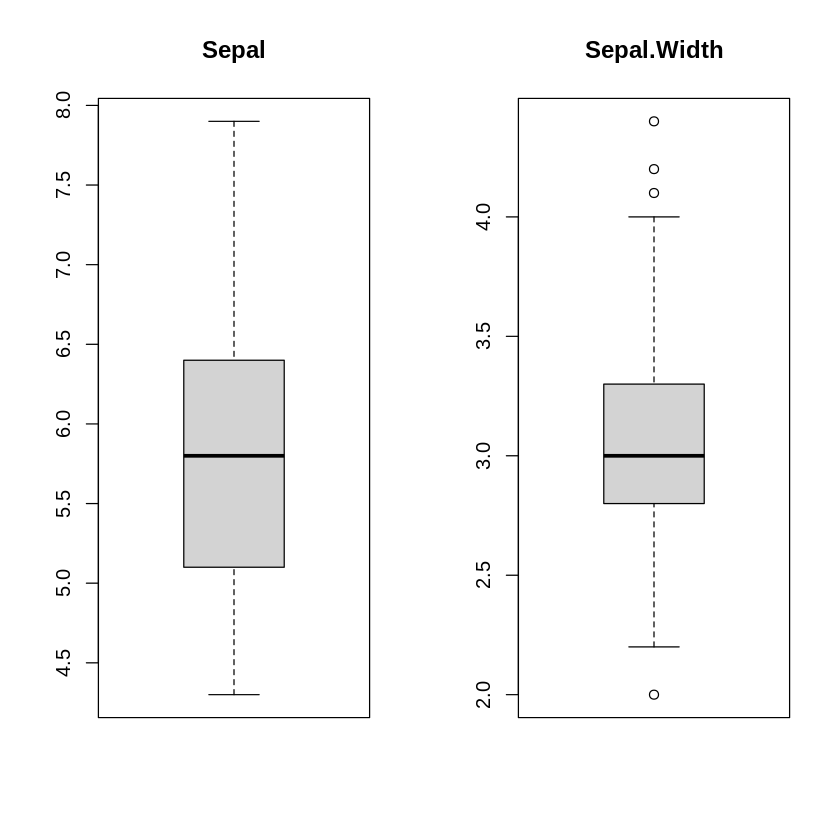

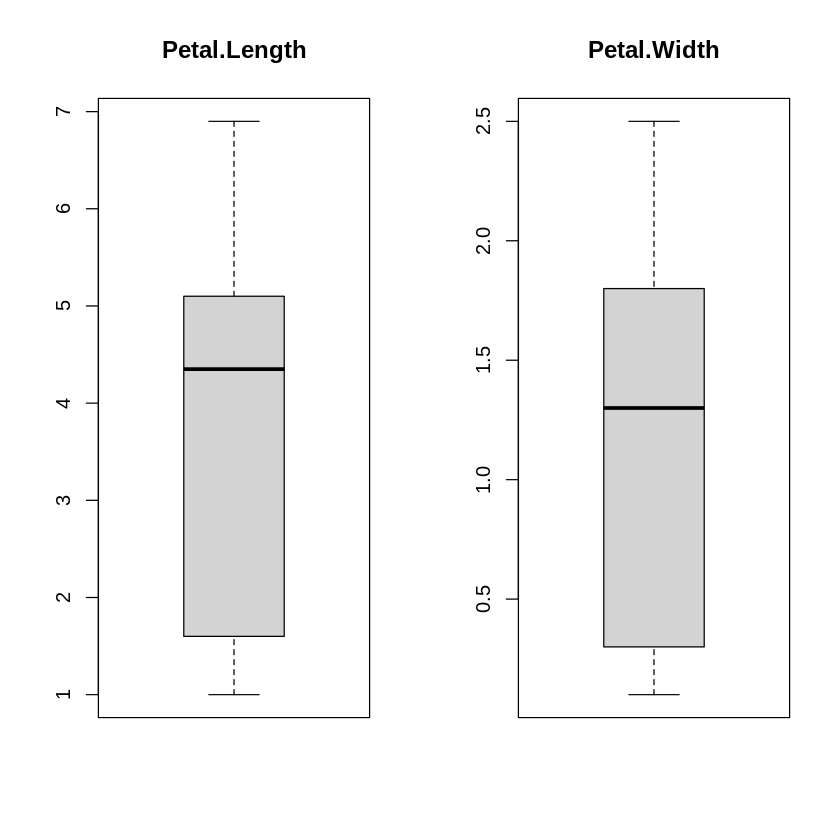

In [18]:
# Boxplot prve četiri varijable (atributa)
par(mfrow=c(1,2)) # ovo nam omogućava da prikažemo 4 grafa jednog uz drugog
boxplot(dataset[,1], main="Sepal")
boxplot(dataset[,2], main=names(iris)[2])
boxplot(dataset[,3], main=names(iris)[3])
boxplot(dataset[,4], main=names(iris)[4])

Posljednja varijabla nam je faktorska varijabla i da bi vidjeli grafički prikaz raspodjele distribucija klasa koristit ćemo ```ggplot2``` paket.  
Znamo da imamo jednak broj instance svake klase, pa će nam grafikon biti malo dosadan.

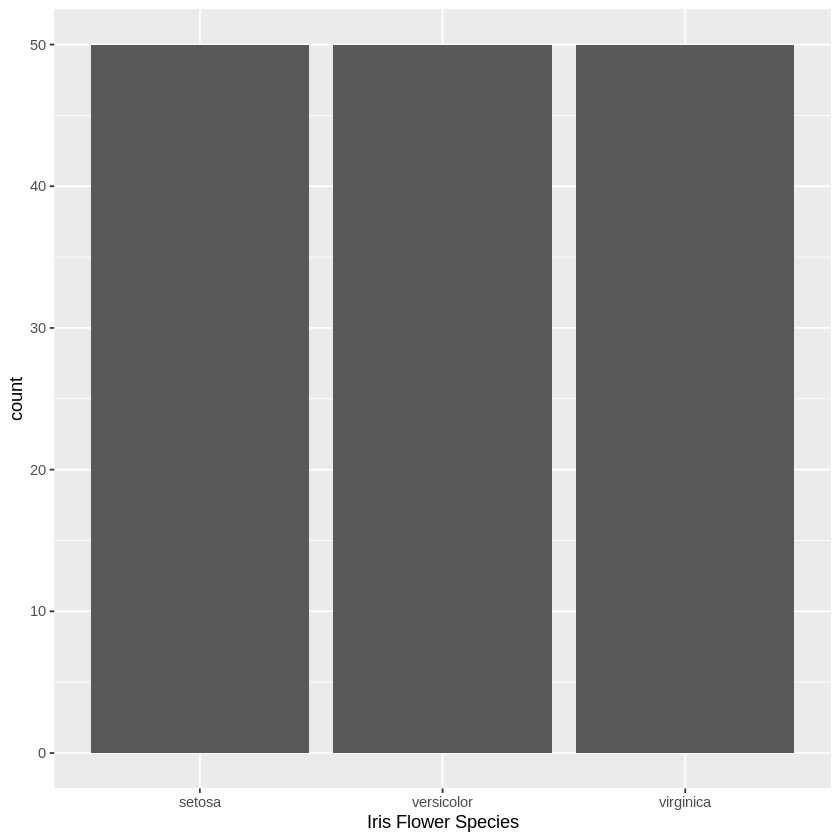

In [23]:
# Graf raspodjele klasa
library(dplyr)
library(ggplot2)

dataset %>% ggplot(aes(x = dataset[,5])) + geom_bar() + labs(x = "Iris Flower Species")

### 4.2 Multivarijantni  grafovi
Multivarijantni grafovi su grafovi na kojima možemo vidjeti odnose među atributima.

In [ ]:
install.packages("ellipse")

### Scatterplot

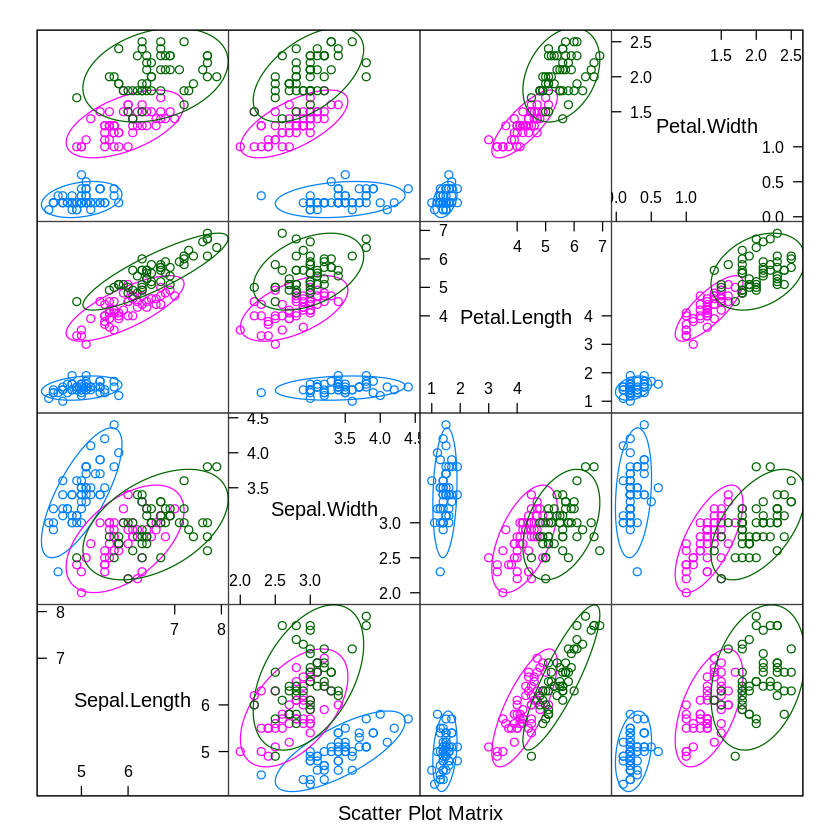

In [27]:
# scatterplot matrix
library(ellipse)

featurePlot(x=dataset[,1:4], y=dataset[,5], plot="ellipse")

### Box i whisker plots

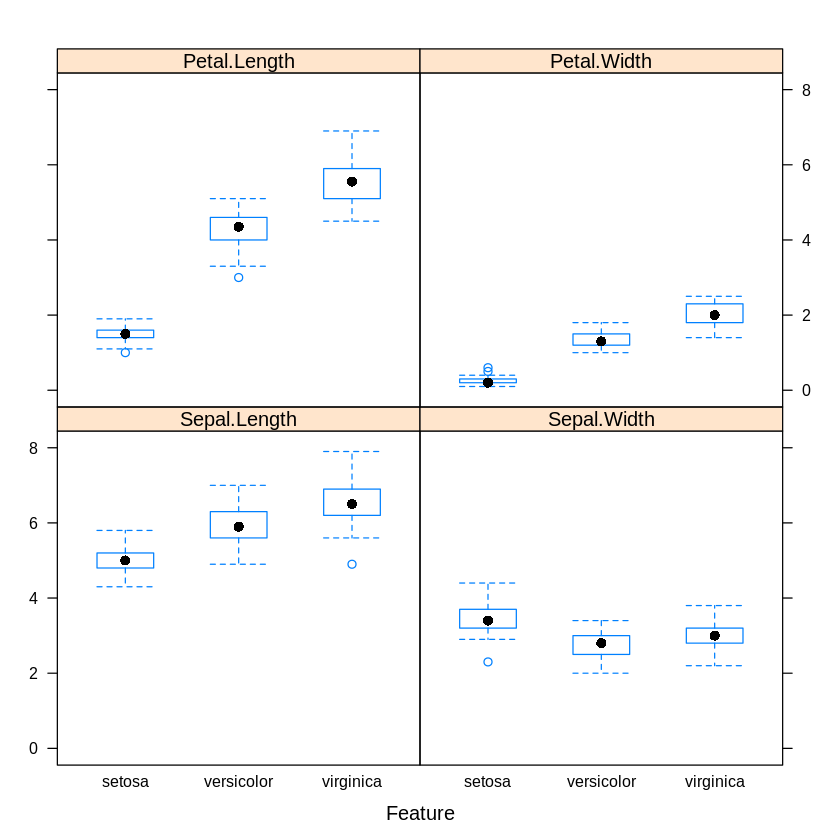

In [28]:
# Box i whisker plots za svaki atribut
featurePlot(x=dataset[,1:4], y=dataset[,5], plot="box") 

### Density plots

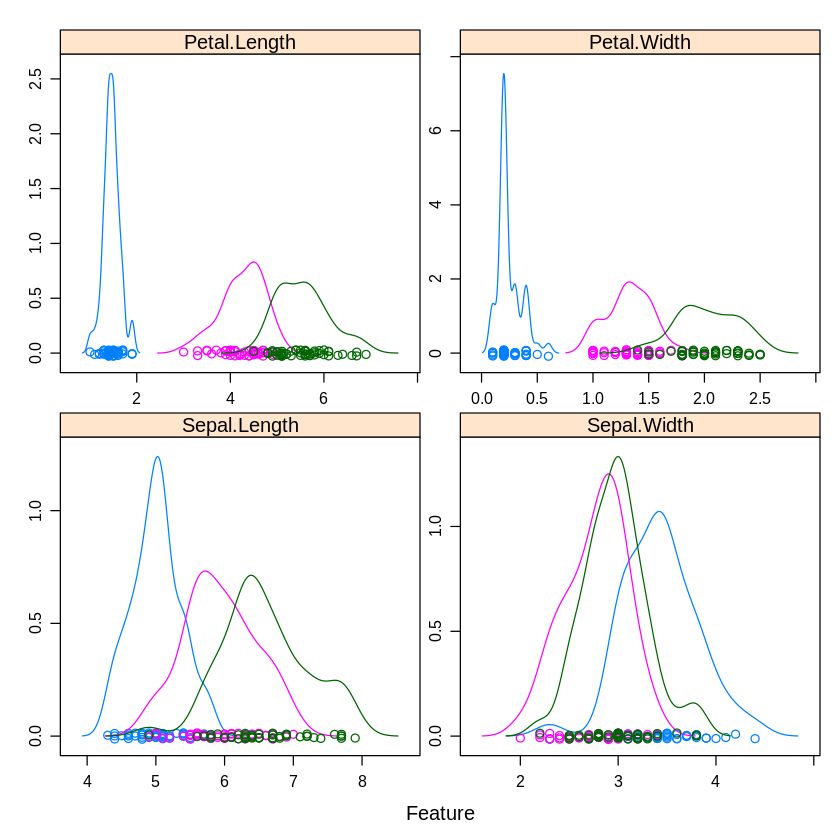

In [29]:
# Grafovi gustoće (density plots) za svaki atribut po vrijednosti klase "species"
scales<-list(x = list(relation = "free"), y = list(relation = "free"))
featurePlot(x=dataset[,1:4], y=dataset[,5], plot = "density", scales = scales)

## 5. Evaluacija algoritama
Evaluaciju algoritma ćemo napraviti u tri koraka:
1. Postavljanje 10-fold cross validacije
2. Izgradnja 5 različitih modela za predviđanje vrsta iz mjerenja cvijeća
3. Odabir najboljeg modela

### 5.1 Deseterostruka unakrsna validacija (10-fold cross validation)
Ovaj postupak će podijeliti skup podataka na 10 dijelova (9 za treniranje i 1 za testiranje), a zatim će proći sve kombinacije tih skupova. Proces će se ponoviti 3 puta za svaki od 5 algoritama, s različitom podjelom podataka na 10 skupina kako bi se dobile preciznije procjene.

In [30]:
# Run algorithms using 10-fold cross validation
control<-trainControl(method = "cv", number = 10)
metric<-"Accuracy"

### 5.2 Izgradnja 5 modela predviđanja
Naš problem pokušati ćemo riješti korištenjem 5 različitih algoritama:  

a. Linear Discriminant Analysis (LDA)  
b. Classification and Regression Trees (CART)  
c. k-Nearest Neighbors (kNN)  
d. Support Vector Machines (SVM) with a linear kernel  
e. Random Forest (RF)

#### Linearni algoritam: LDA

In [ ]:
install.packages("e1071")

In [35]:
# Linear Discriminant Analysis (LDA)  
library(e1071)
set.seed(7)
fit.lda <- train(Species~., data=dataset_train, method="lda", metric=metric, trControl=control)

#### Nelinearni algoritmi: CART and kNN

In [36]:
# Classification and Regression Trees (CART)
set.seed(7)
fit.cart <- train(Species~., data=dataset_train, method="rpart", metric=metric, trControl=control)

# k-Nearest Neighbors (kNN)
set.seed(7)
fit.knn <- train(Species~., data=dataset_train, method="knn", metric=metric, trControl=control)

#### Napredni algoritmi: SVM and RF

In [ ]:
install.packages("kernlab")
install.packages("randomForest")

In [45]:
library(kernlab)
# Support Vector Machines (SVM)
set.seed(7)
fit.svm <- train(Species~., data=dataset_train, method="svmRadial", metric=metric, trControl=control)

library(randomForest)
# Random Forest (RF)
set.seed(7)
fit.rf <- train(Species~., data=dataset_train, method="rf", metric=metric, trControl=control)

### 5.3 Odabir najboljeg modela
Nakon što smo kreirali pet modela i procjenili točnost za svaki, sljedeći zadatak je bio usporediti modele i odabrati najtočnije.

Da bi to učinili, napraviti ćemo popis korištenih modela i proslijediti ove rezultate funkciji sažetka _"summary()"_ da bi dobili izlaz koji prikazuje točnost svakog klasifikatora kao i mnoge druge mjerne podatke, poput Kappe.  

In [ ]:
results <- resamples(list(lda=fit.lda,cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)

Zatim smo kreirali graf rezultata evaluacije modela te usporedili raspršenost i srednju točnost svakog modela. Važno je napomenuti da postoji niz mjerenja točnosti za svaki algoritam, jer je svaki algoritam ocijenjen 10 puta (10 puta unakrsna validacija), zbog čega je trebalo usporediti srednje vrijednosti točnosti modela. Najtočniji model u ovom slučaju bio je LDA, s obzirom da je imao najveću srednju točnost s najmanjom raspršenosti.

**Kappa** statistika nam pokazuje koliko su se instance klasificirane klasifikatorom strojnog učenja podudarale s podacima označenima kao točnim. 
U osnovi što je kappa bliže 1 to je bolje.

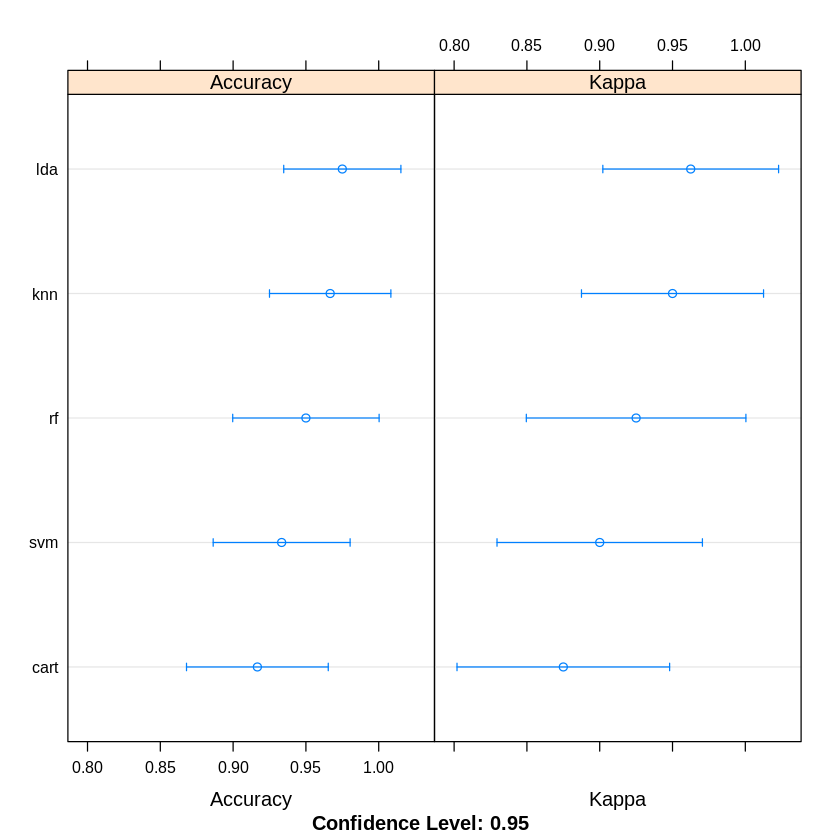

In [49]:
# Graf usporedbe točnosti modela
dotplot(results)

Budući da je LDA identificiran kao najbolji model, prikazati ćemo summary samo za njega. 

In [50]:
# Sažetak našeg najboljeg modela - LDA
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



## 6. Predviđanje

LDA se pokazao koa najprecizniji model na skupu za treniranje, ali moramo odrediti točnost modela na skupu za testiranje da bi dobili neovisnu završnu provjeru ispravnosti najboljeg modela.  
Kao primjer dobre prakse, zadržali smo skup za testiranje za provjeru valjanosti u slučaju prekomjernog uklapanja (overfitinga).

LDA model je pokrenut izravno na skupu za testiranje, a rezultati su sažeti u matrici konfuzije. Točnost je bila 100%. To je bio mali skup podataka (20%), ali taj je rezultat bio unutar očekivane granice od 97% +/- 4% što sugerira da je LDA točan i pouzdan model.

In [51]:
# Estimate skill of LDA on the validation dataset
predictions<-predict(fit.lda, dataset_test)
confusionMatrix(predictions, dataset_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            